In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import matplotlib.patches as mpatches
import os

# Bout Bar Plot

Animal                 AH1     AH4     AH2     AH3    AD61    AD62   AD131  \
Keys                                                                         
Locomotion          4143.0  4196.0  3575.0  4425.0  1492.0  2663.0  2220.0   
Investigate Type 1   505.0   540.0   650.0   515.0    12.0    34.0    16.0   
Investigate Type 2  4497.0  4162.0  4374.0  4120.0  2086.0  2747.0  1041.0   
Investigate Type 3   281.0   581.0   259.0   232.0   242.0   338.0   230.0   
Dive/Scrunch         278.0   480.0   301.0   211.0   160.0   247.0   154.0   
Contra-Orient       1710.0  1862.0  1808.0  1630.0   853.0  1191.0   936.0   
Ipsi-Orient         2053.0  2382.0  2061.0  1907.0   974.0  1413.0  1417.0   
Face Groom Type 1    183.0   339.0   250.0   244.0   380.0   478.0   531.0   
Face Groom Type 2      3.0    13.0    39.0    18.0     NaN     1.0     NaN   
Rear                  35.0     8.0    18.0    44.0     8.0     8.0    23.0   
Ipsi-Body Groom      147.0    72.0    97.0   117.0   858.0   694

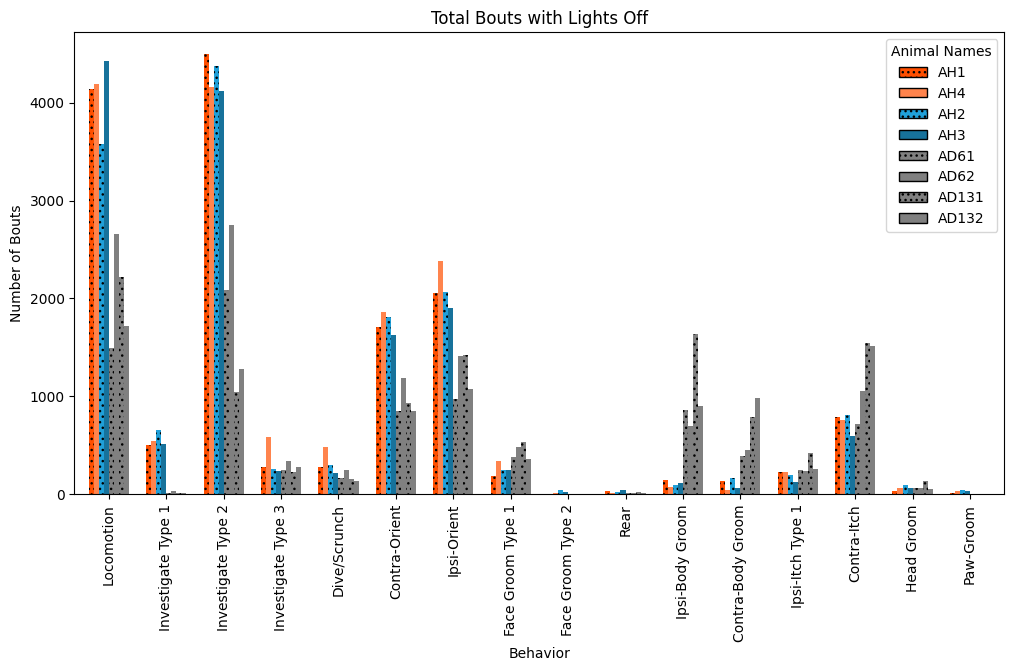

In [55]:
# Define the function to parse the CSV file
def parse_csv(filename):
    data = {}
    animal_name = ""

    with open(filename, newline='') as csvfile:
        first_line = csvfile.readline().strip().split(' ')
        if len(first_line) >= 1:
            animal_name = first_line[0].strip()

    reader = pd.read_csv(filename, skiprows=1)
    for index, row in reader.iterrows():
        if animal_name:
            key = row[0]
            value = int(row[1])
            data[animal_name] = data.get(animal_name, {})
            data[animal_name][key] = value

    return data

root = tk.Tk()
root.withdraw()

file_paths = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=[("CSV Files", "*.csv")]
)

if not file_paths:
    print("No CSV files selected.")
else:
    keys = []
    values = []
    colors = []

    for file_path in file_paths:
        file_data = parse_csv(file_path)
        for animal, data in file_data.items():
            if 'insignificant' in data:
                del data['insignificant']  # Remove the 'Insignificant' key and its data
            for key, value in data.items():
                keys.append(key)
                values.append(value)
                colors.append(animal)

    df = pd.DataFrame({'Keys': keys, 'Values': values, 'Animal': colors})
    
    # Filter out the 'Insignificant' key and its data from the DataFrame
    df = df[df['Keys'] != 'insignificant']
    
    # Reorder the DataFrame by the desired animal order and index order
    animal_order = ['AH1', 'AH4', 'AH2', 'AH3','AD61','AD62','AD131','AD132']
    key_order = ['Locomotion', 'Investigate Type 1','Investigate Type 2', 'Investigate Type 3',
                 'Dive/Scrunch', 'Contra-Orient','Ipsi-Orient','Face Groom Type 1',
                 'Face Groom Type 2', 'Rear','Ipsi-Body Groom','Contra-Body Groom', 'Ipsi-Itch Type 1',
                 'Contra-Itch', 'Head Groom', 'Paw-Groom'
                ] # Get the unique keys in the order they appear in the DataFrame
    
    pivot_df = df.pivot(index='Keys', columns='Animal', values='Values')

    # Reorder columns based on animal_order
    pivot_df = pivot_df[animal_order]

    # Reorder rows based on key_order
    pivot_df = pivot_df.reindex(key_order)

    # Define colors for AH1, AH2, AH3, and AH4
    colors = {'AH1': '#ff4f00', 'AH2': '#20a0d9', 'AH3': '#17729b', 'AH4': '#ff844d'}
    
    ax = pivot_df.plot(kind='bar', figsize=(12, 6), color=[colors.get(col, 'gray') for col in pivot_df.columns], width=0.7)
    
    folders = (os.path.dirname(file_path)).split('/')
    fol5 = folders[5].split(' ')  # Split element at position 3 by hyphen
    fol6 = folders[6]  
    
    # You want to count skip every 16 which is one animal because hatching identifies the animal. 
    # This ensures there is one animal per group with hatching 
    step = 16  # Step size: The number of behaviors for each animal
    counter = 0  # Counter to keep track of the current position
    bars_to_hatch = []
    while counter < len(ax.patches):
        bars_to_hatch.extend(ax.patches[counter:counter+step])
        counter += step * 2

    for i, bar in enumerate(bars_to_hatch):
        if i < 16:
            bar.set_hatch('...')  # Apply '***' hatch pattern to the first 16 bars
        else:
            bar.set_hatch('...')  # Apply '///' hatch pattern to the next 16 bars
    

    plt.title(f'Total {fol5[0]}s with {fol6}')
    plt.xlabel('Behavior')
    plt.ylabel('Number of Bouts')
    # Print the table
    print(pivot_df)

    # Create a legend with labels and hatching patterns
    legend_handles = []
    
    for i, animal in enumerate(animal_order):
        # Determine the hatch pattern based on the index
        hatch = '...' if i % 2 == 0 else ''
            
        # Create a colored patch with a label and custom hatch pattern
        color_patch = mpatches.Patch(facecolor=colors.get(animal, 'gray'), edgecolor='black', label=animal, hatch=hatch)

        # Append the color patch to the legend_handles list
        legend_handles.append(color_patch)

    # Add a legend to the plot, specifying the custom legend handles
    plt.legend(handles=legend_handles, title='Animal Names')

    # Display the plot
    plt.show()
root.destroy()


# Average Duration Bar Plot

Animal                   AH1       AH4       AH2       AH3      AD61  \
Keys                                                                   
Locomotion          0.324909  0.312035  0.326350  0.379751  0.234316   
Investigate Type 1  0.240594  0.243704  0.240769  0.214951  0.141667   
Investigate Type 2  0.278119  0.283542  0.293919  0.273155  0.497315   
Investigate Type 3  0.210320  0.192083  0.226641  0.193966  0.255372   
Dive/Scrunch        0.122662  0.119583  0.116611  0.114692  0.117500   
Contra-Orient       0.127135  0.122664  0.129978  0.129632  0.119109   
Ipsi-Orient         0.136678  0.131654  0.143037  0.143209  0.135832   
Face Groom Type 1   0.186885  0.190265  0.312000  0.343443  0.189211   
Face Groom Type 2   0.133333  0.238462  0.179487  0.144444       NaN   
Rear                0.157143  0.125000  0.277778  0.206818  0.175000   
Ipsi-Body Groom     0.136054  0.106944  0.175258  0.153846  0.265035   
Contra-Body Groom   0.166412  0.110000  0.189634  0.127869  0.26

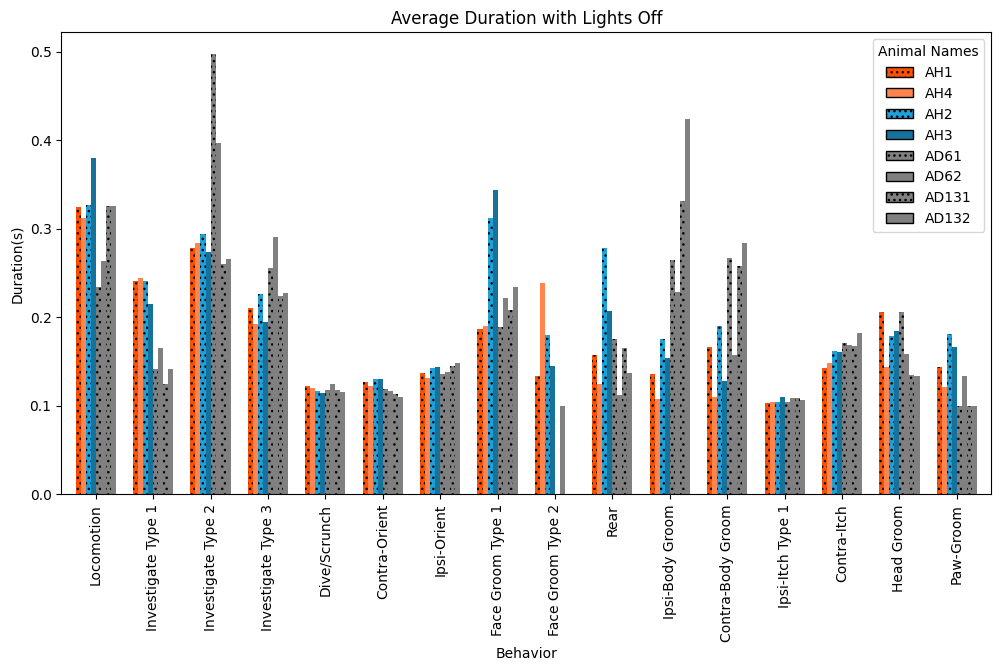

In [57]:
# Define the function to parse the CSV file
def parse_csv(filename):
    data = {}
    animal_name = ""

    with open(filename, newline='') as csvfile:
        first_line = csvfile.readline().strip().split(' ')
        if len(first_line) >= 1:
            animal_name = first_line[0].strip()

    reader = pd.read_csv(filename, skiprows=1)
    for index, row in reader.iterrows():
        if animal_name:
            key = row[0]
            value = float(row[1])
            data[animal_name] = data.get(animal_name, {})
            data[animal_name][key] = value

    return data

root = tk.Tk()
root.withdraw()

file_paths = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=[("CSV Files", "*.csv")]
)

if not file_paths:
    print("No CSV files selected.")
else:
    keys = []
    values = []
    colors = []

    for file_path in file_paths:
        file_data = parse_csv(file_path)
        for animal, data in file_data.items():
            if 'insignificant' in data:
                del data['insignificant']  # Remove the 'Insignificant' key and its data
            for key, value in data.items():
                keys.append(key)
                values.append(value)
                colors.append(animal)

    df = pd.DataFrame({'Keys': keys, 'Values': values, 'Animal': colors})
    
    # Filter out the 'Insignificant' key and its data from the DataFrame
    df = df[df['Keys'] != 'insignificant']
    
    # Reorder the DataFrame by the desired animal order and index order
    animal_order = ['AH1', 'AH4', 'AH2', 'AH3','AD61','AD62','AD131','AD132']
    key_order = ['Locomotion', 'Investigate Type 1','Investigate Type 2', 'Investigate Type 3',
                'Dive/Scrunch', 'Contra-Orient','Ipsi-Orient','Face Groom Type 1',
                'Face Groom Type 2', 'Rear','Ipsi-Body Groom','Contra-Body Groom',
                'Ipsi-Itch Type 1', 'Contra-Itch','Head Groom', 'Paw-Groom'
                 ]   # Get the unique keys in the order they appear in the DataFrame

    pivot_df = df.pivot(index='Keys', columns='Animal', values='Values')

    # Reorder columns based on animal_order
    pivot_df = pivot_df[animal_order]

    # Reorder rows based on key_order
    pivot_df = pivot_df.reindex(key_order)

    # Define colors for AH1, AH2, AH3, and AH4
    colors = {'AH1': '#ff4f00', 'AH2': '#20a0d9', 'AH3': '#17729b', 'AH4': '#ff844d'}
    
    ax = pivot_df.plot(kind='bar', figsize=(12, 6), color=[colors.get(col, 'gray') for col in pivot_df.columns],width=0.7)
    
    folders = (os.path.dirname(file_path)).split('/')
    fol5 = folders[5].split(' ')  # Split element at position 3 by hyphen
    fol6 = folders[6]  
    
    # You want to count skip every 16 which is one animal because hatching identifies the animal. 
    # This ensures there is one animal per group with hatching 
    step = 16  # Step size: The number of behaviors for each animal
    counter = 0  # Counter to keep track of the current position
    bars_to_hatch = []
    while counter < len(ax.patches):
        bars_to_hatch.extend(ax.patches[counter:counter+step])
        counter += step * 2

    for i, bar in enumerate(bars_to_hatch):
        if i < 16:
            bar.set_hatch('...')  # Apply '***' hatch pattern to the first 16 bars
        else:
            bar.set_hatch('...')  # Apply '///' hatch pattern to the next 16 bars

    plt.title(f'{fol5[0]} {fol5[1]} with {fol6}')
    plt.xlabel('Behavior')
    plt.ylabel('Duration(s)')
    print(pivot_df)

    legend_handles = []
    
    for i, animal in enumerate(animal_order):
        # Determine the hatch pattern based on the index
        hatch = '...' if i % 2 == 0 else ''
            
        # Create a colored patch with a label and custom hatch pattern
        color_patch = mpatches.Patch(facecolor=colors.get(animal, 'gray'), edgecolor='black', label=animal, hatch=hatch)

        # Append the color patch to the legend_handles list
        legend_handles.append(color_patch)

    # Add a legend to the plot, specifying the custom legend handles
    plt.legend(handles=legend_handles, title='Animal Names')

    # Display the plot
    plt.show()
root.destroy()
